<a href="https://colab.research.google.com/github/AhmadNass7/teaching/blob/main/INTRO_TO_FINAL_ASSESEMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

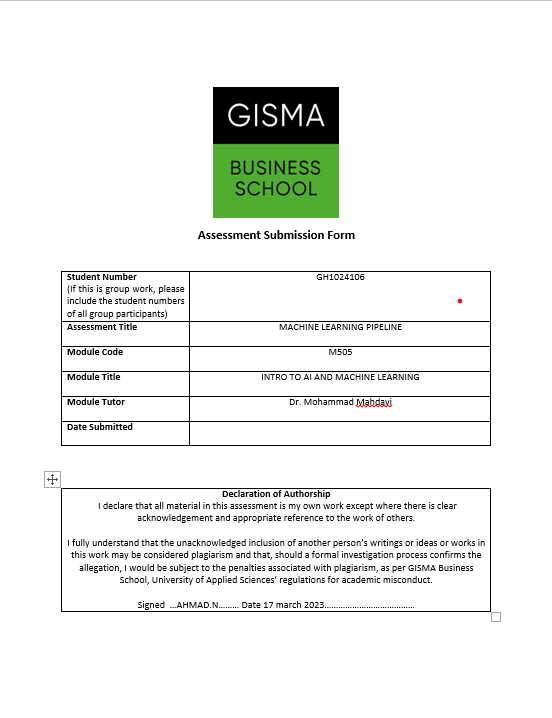

## A brief summary of the Data Set that has been collected here

* This data set basically discusses the factors that lead to lung cancer and its affectiveness on human beings. It is shown here that there are plenty of features that are increasing the death of human beings. As a data scientist, my purpose is to create a pipeline that predicts if a person is affected by lung cancer or not by using the stated features /factors.

* This Data Set is taken from kaggle , a well known site that contains different types of Data Sets and below is a brief summary of the Data Set.






* Quality Information:

1.Gender: M(male), F(female)

2.Age: Age of the patient

3.Smoking: YES=2 , NO=1.

4.Yellow fingers: YES=2 , NO=1.

5.Anxiety: YES=2 , NO=1.

6.Peer_pressure: YES=2 , NO=1.

7.Chronic Disease: YES=2 , NO=1.

8.Fatigue: YES=2 , NO=1.

9.Allergy: YES=2 , NO=1.

10.Wheezing: YES=2 , NO=1.

11.Alcohol: YES=2 , NO=1.

12.Coughing: YES=2 , NO=1.

13.Shortness of Breath: YES=2 , NO=1.

14.Swallowing Difficulty: YES=2 , NO=1.

15.Chest pain: YES=2 , NO=1.

16.Lung Cancer: YES , NO.


Lung Cancer (2021). Available at: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer.

## Importing Libraries

**Here we imported specific libraries to be able to run our codes, and these libraries were imported succesfully.**

In [ ]:



import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing
import imblearn.over_sampling
import sklearn.svm
import sklearn.tree
import sklearn.neighbors
import sklearn.linear_model
import sklearn.metrics


## Loading the Data Sets

**The second step is loading the Data Set where we upload the Data Set taken and implement it in our machine learning pipeline, so it will be shown clearly with all its given features. In addition to that, I printed the first 5 samples of this Data Set.  **

In [ ]:



df=pd.read_csv("slc.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Splitting The Data Sets into Training and Testing

 **Splitting the Data Sets into training and testing is basically to determine the effectiveness of the machine learning pipeline and be able to match our predictions to prevent Data leakage. Its shown here that 231 of the Data Set were used for training and 78 of the Data Set were used for testing. **

In [ ]:




df_train, df_test= sklearn.model_selection.train_test_split(df, random_state=20)


print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df_train size: (231, 16)
df_test size: (78, 16)


## Data Exploration


**Data exploration is basically the technique or method used to make the Data Set simpler and understandable, inorder to maintain a good data analysis and dig into deeper visualization of the Data Set I am working with. **

# **It is shown here that i used unique function to look for implicit missing values. Implicit missing values are basically represented by unique elements that indicates missing data. Its important to figure out implicit missing values since they have a huge effect on our predictions and conclusions. PS: Renaming columns is used here because 'Fatigue' and 'Allergy' was indicated unproperly having a space thats why i renamed the column to fit them correctly and precisely. It should be both renamed in training and testing.**

In [ ]:
## Training Section:

df_train["AGE"].unique()

df_train["SMOKING"].unique()

df_train["YELLOW_FINGERS"].unique()

df_train["ANXIETY"].unique()

df_train["PEER_PRESSURE"].unique()

df_train["CHRONIC DISEASE"].unique()

df_train = df_train.rename(columns={'FATIGUE ' : 'FATIGUE', 'ALLERGY ' : 'ALLERGY'})
## Renaming the columns


df_train["FATIGUE"].unique()

df_train["ALLERGY"].unique()

df_train["WHEEZING"].unique()

df_train["ALCOHOL CONSUMING"].unique()

df_train["COUGHING"].unique()

df_train["SHORTNESS OF BREATH"].unique()

df_train["SWALLOWING DIFFICULTY"].unique()

df_train["CHEST PAIN"].unique()

df_train["LUNG_CANCER"].unique()




## Testing Section:


df_test["AGE"].unique()

df_test["SMOKING"].unique()

df_test["YELLOW_FINGERS"].unique()

df_test["ANXIETY"].unique()

df_test["PEER_PRESSURE"].unique()

df_test["CHRONIC DISEASE"].unique()

df_test = df_test.rename(columns={'FATIGUE ' : 'FATIGUE', 'ALLERGY ' : 'ALLERGY'})
## Renaming the columm


df_test["FATIGUE"].unique()

df_test["ALLERGY"].unique()

df_test["WHEEZING"].unique()

df_test["ALCOHOL CONSUMING"].unique()

df_test["COUGHING"].unique()

df_test["SHORTNESS OF BREATH"].unique()

df_test["SWALLOWING DIFFICULTY"].unique()

df_test["CHEST PAIN"].unique()

df_test["LUNG_CANCER"].unique()








array(['YES', 'NO'], dtype=object)

In [ ]:
df_test["LUNG_CANCER"].value_counts()

YES    64
NO     14
Name: LUNG_CANCER, dtype: int64

**This means the data set should be balanced. There is a huge difference between the 'Yes' and 'No' values. Hence, to be able to fix this problem we should use 'SMOTE'algorithm to make them balanced.**

## Data Processing and Feature Engineering

In [ ]:
## My Data Set doesnt have any missing values


df_train.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Seperating The Features and The Target Label

**Seperating the Features from the Target label is an important step in machine learning pipeline. It is  clearly observed by differentiating the features(input) from the target label(output)that the model is trying to predict.We can  simply determine it by asking whats the purpose of using this Data Set ? What is our target?  What should we predict ?. It is shown here that our aim is to determine if a person has a lung cancer or not by the help of the given features.**

In [ ]:
x_train= df_train.drop(["LUNG_CANCER"], axis=1)
y_train= df_train["LUNG_CANCER"]

x_test= df_test.drop(["LUNG_CANCER"], axis=1)
y_test= df_test["LUNG_CANCER"]




print("x_train size:",x_train.shape)
print("x_test size:",x_test.shape)
print("y_train size:",y_train.shape)
print("y_test size:",y_test.shape)

x_train size: (231, 15)
x_test size: (78, 15)
y_train size: (231,)
y_test size: (78,)


## Encoding Categorical Attributes

**Implementing** "The Hot Encoder" is because machine learning pipelines  only understands binary values '0' and '1'. Thats why I used it to encode  the  values so that the model can be understood clearly. Encoding the attributes inorder to transform the  data into binary values that is basically applied on training and testing sets.

In [ ]:
# Implenting "The Hot Encoder"

man= sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore") ## creating encoding object
man.fit(x_train) ## fitting the econdinng on training data


#Encoding the categorical attributes of training Data
x_train= man.transform(x_train)

#Encoding the categorical attributes of test data
x_test= man.transform(x_test)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (231, 65)
x_test: (78, 65)


## Standardlization

S**tandardlization is the process of retreiving the features to the same scale inorder to improve the performance of the machine learning pipeline.**




In [ ]:
# Building a standardization model
scaler= sklearn.preprocessing.StandardScaler(with_mean=False)
scaler.fit(x_train)

# Scaling the training features
x_train= scaler.transform(x_train)

#Reducing the number of test features
x_test= scaler.transform(x_test)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (231, 65)
x_test: (78, 65)


## Imbalanced Classes

***SMOTE is basically an important algorithm in machine learning pipeline since it is used to balance the number of samples of all classes. This will definetly increase the perfomance of the Data Set effectively. It is clearly shown here that they are balanced after implementing the method "SMOTE". ***

In [ ]:
sm = imblearn.over_sampling.SMOTE(random_state=20)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
print("x_train_resampled size", x_train_resampled.shape)
print("y_train_resampled size", y_train_resampled.shape)

x_train_resampled size (412, 65)
y_train_resampled size (412,)


## Choosing The algorithms

**I have implemented 4 different types of machine algorithms to percieve the effect of each algorithm on this Data Set. These 4 different algorithms are : Support Vector Machine - Decision Trees- Logistic Regression- K Nearest Neighbor.**

In [ ]:
model_svm= sklearn.svm.SVC()
model_decision_trees= sklearn.tree.DecisionTreeClassifier()
model_logistic_regression= sklearn.linear_model.LogisticRegression()
model_KNN=sklearn.neighbors.KNeighborsClassifier()

## Defining a Grid

**Implmenting SVM model algorithm with its unique hyperparameters to determine the accuracy using the "GRIDSEARCH CV" .**

In [ ]:
parameters_svm= {'kernel':( 'linear', 'rbf') , 'C':[0.1,1,2]}
model_svm=sklearn.svm.SVC()
clf_svm= sklearn.model_selection.GridSearchCV(model_svm,parameters_svm,  scoring='accuracy', cv= 5, n_jobs=-1)
clf_svm.fit(x_train_resampled, y_train_resampled)
print("The best score of our tunned model is",clf_svm.best_score_)
print("The best hyperparameter of our tunned model is",clf_svm.best_params_)

The best score of our tunned model is 0.9684396121069645
The best hyperparameter of our tunned model is {'C': 2, 'kernel': 'rbf'}


**On the other hand, Decision Trees model algorthims is implmeneted with its unique hypermarameters to determine the accuracy using the "GRIDSEARCH CV" .**

In [ ]:
parameters_decision_trees= {'criterion':('entropy','gini'), 'max_depth':[2,4,7]}
model_decision_trees= sklearn.tree.DecisionTreeClassifier()
clf_decision_trees=sklearn.model_selection.GridSearchCV(model_decision_trees,parameters_decision_trees, scoring='accuracy', cv= 5, n_jobs=-1)
clf_decision_trees.fit(x_train_resampled, y_train_resampled)
print("The best score of our tunned model is",clf_decision_trees.best_score_)
print("The best score of our tunned model is",clf_decision_trees.best_params_)

The best score of our tunned model is 0.9539523949456361
The best score of our tunned model is {'criterion': 'gini', 'max_depth': 7}


**Logistic regeression model algorthim is implemented with its unique hyperparameters to determine the accuracy using the "GRIDSEARCH CV" .**

In [ ]:
parameters_logistic_regression={ 'C' :[0.1,1.0,3], 'random_state' : [20]}

model_logistic_regression= sklearn.linear_model.LogisticRegression(max_iter=500)

clf_logistic_regression=sklearn.model_selection.GridSearchCV(model_logistic_regression,parameters_logistic_regression, scoring='accuracy', cv= 5, n_jobs=-1)

clf_logistic_regression.fit(x_train_resampled, y_train_resampled)
print("The best score of our tunned model is",clf_logistic_regression.best_score_)
print("The best score of our tunned model is",clf_logistic_regression.best_params_)

The best score of our tunned model is 0.934410813987658
The best score of our tunned model is {'C': 3, 'random_state': 20}


 **K Nearest Neighbor model algorthim is implemented  with its unique hyperparameters to determine the accuracy using the " GRIDSEARCH CV" .**

In [ ]:
parameters_KNN= {'weights':['uniform'], 'n_neighbors':[2,5]}
model_KNN= sklearn.neighbors.KNeighborsClassifier()
clf_KNN=sklearn.model_selection.GridSearchCV(model_KNN,parameters_KNN, scoring='accuracy', cv= 5, n_jobs=-1)
clf_KNN.fit(x_train_resampled, y_train_resampled)
print("The best score of our tunned model is",clf_KNN.best_score_)
print("The best score of our tunned model is",clf_KNN.best_params_)

The best score of our tunned model is 0.8640611225389362
The best score of our tunned model is {'n_neighbors': 2, 'weights': 'uniform'}


**Upon implementing  the 4 different model algorithms and comparing their accuracy, it is shown that Support Vector Machine gained the highest accuracy of 96 thats why I planned on working on Support Vector Machine.**

## Support Machine Vector /Tuning The Hyperparameters

Since we chose to workw ith Support Vector Machine , we implemented GridSearch to find its tuned hyperparameters.

In [ ]:
y_pred_final= clf_svm.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_pred_final, y_test)
print(f"The accuracy of our final predictions using svm  is {accuracy}")

The accuracy of our final predictions using svm  is 0.9358974358974359


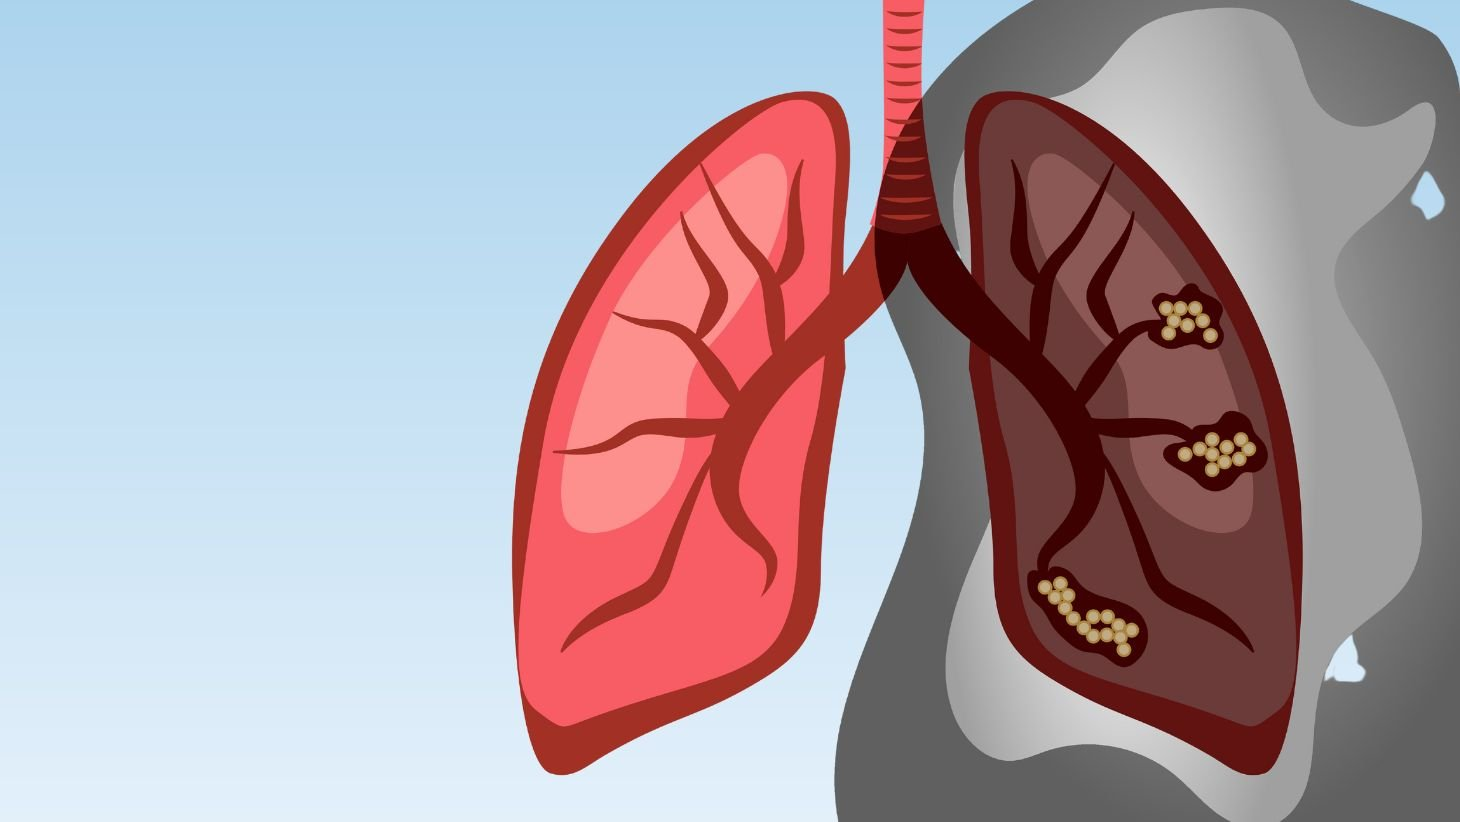

In [ ]:
import IPython.display
image_address = "https://www.oregoncancer.com/hubfs/Top%205%20Lung%20Cancer%20Causes%20in%20NonSmokers%20-%20willamette%20valley%20cancer.jpg"
IPython.display.Image(image_address)

**As in conclusion, it has been determined that  implementing  machine algorthim pipeline will definetly help us predcit accurate assumptions  which makes it much easier and  understandable. As a data scientist , our main goal is to interpret and analyze correctly any data set given inorder to maintain good results. According to this data, and upon the usage of different algortithms it is shown clearly which features leads to lung cancer. **     

***                     !!!! STOP SMOKING!!!***


DONE BY: AHMAD NASSER

STUDENT ID: GH1024106

In [ ]:
!jupyter nbconvert --to html INTRO_TO_FINAL_ASSESEMENT.ipynb

[NbConvertApp] Converting notebook INTRO_TO_FINAL_ASSESEMENT.ipynb to html
[NbConvertApp] Writing 791902 bytes to INTRO_TO_FINAL_ASSESEMENT.html
